test the pylamost

In [1]:
def showHtml(html):
    from IPython.core.display import display, HTML
    display(HTML(html))

In order to access protected LAMOST data, you should provide your token.
Your token can be obtained from http://dr.lamost.org/ucenter/mytoken, the "Password" is the token.
When you get your token you can also create a file `~/pylamost.ini` or `%userprofile%/pylamost.ini` on Windows, with content:
```
token=12345678
```
Then you don't have to write the token next time.

In [2]:
from pylamost import lamost
lm=lamost()#init the lamost class
#lm.token='12345678'#specify your token. You can pass this step, if you created the ~/pylamost.ini file.
lm.dataset=5 #specify the Data Release number
#lm.version=1 #specify the data version, or leave it None to always use the leatest version.

Query interface

In [3]:
params={'output.fmt':'csv','obsidTextarea':'353301001'}
hl=lm.query(params)
showHtml(hl)

In [4]:
params={'output.fmt':'csv','pos.type':'proximity'}
files={'pos.posfile':('sample.txt', open('sample.txt', 'r'))}
hl=lm.query2(params, files)
showHtml(hl)

SQL query interface

In [5]:
lm.sql('select 1')

'#\tPowered by Chinese Virtual Observatory (China-VO): www.china-vo.org 2018-01-31 16:38:59\n#\tIn case of problem: please contact support@lamost.org\n#----------------------------------------------------------------------------\n#\t?column?|null|null|null\n#----------------------------------------------------------------------------\n?column?\n1\n'

simple information

In [6]:
lm.getInfo('353301001')

'{"response":[{"what":"obsid","action":"","data":"353301001"},{"what":"designation","action":"","data":"J224415.49+193359.7"},{"what":"obsdate","action":"","data":"2015-09-12"},{"what":"mjd","action":"","data":"57277"},{"what":"lmjd","action":"","data":"57278"},{"what":"planid","action":"","data":"EG224429N215706B01"},{"what":"spid","action":"","data":"1"},{"what":"fiberid","action":"","data":"1"},{"what":"ra","action":"","data":"341.0645660000"},{"what":"dec","action":"","data":"19.5665910000"},{"what":"class","action":"","data":"STAR"},{"what":"subclass","action":"","data":"K7"},{"what":"z","action":"","data":"0.0000400277"},{"what":"logg","action":"","data":"4.701"},{"what":"teff","action":"","data":"4141.41"},{"what":"feh","action":"","data":"-0.323"},{"what":"rv","action":"","data":"12.00"}]}'

download FITS file

In [7]:
lm.downloadFits(obsid='353301001',savedir='./')

download png

In [8]:
lm.downloadPng(obsid='353301007',savedir='./')

download csv format spectrum

In [9]:
csv = lm.getFitsCsv(obsid='353301007')
#print(csv)

Cone Search Protocol

In [10]:
cs = lm.conesearch(ra=10.0004738,dec=40.9952444,radius=0.2)
#print(cs)

Simple Spectral Access Protocol

In [11]:
ssap = lm.ssap(ra=10.0004738,dec=40.9952444,radius=0.2)
#print(ssap)

read local spectrum fits to data array, then same result as getFitsCsv() which is online function

In [12]:
wavelength, specflux, spec_smooth_7, spec_smooth_15=lm.readFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')
#print('wavelength', wavelength)
#print('specflux', specflux)
#print('spec_smooth_7', spec_smooth_7)
#print('spec_smooth_15', spec_smooth_15)

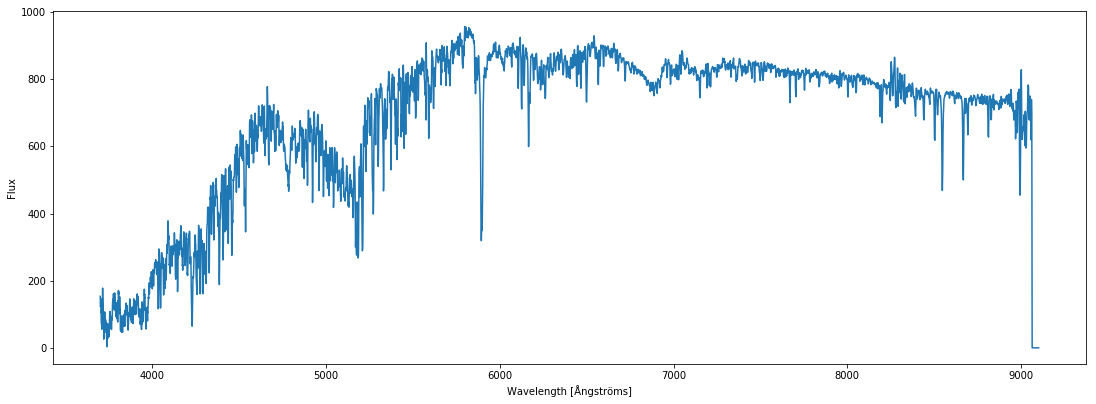

In [13]:
lm.plotFits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')